In [19]:
import numpy as np
import matplotlib.pyplot as plt

text = """
............
........0...
.....0......
.......0....
....0.......
......A.....
............
............
........A...
.........A..
............
............
"""

In [20]:
matrix = np.array([[y for y in x] for x in text.strip().split('\n')]).astype("<U3")
print(f"shape: {matrix.shape}")

MAX_LEN = matrix.shape[0]

matrix

shape: (12, 12)


array([['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '0', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '0', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '0', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '0', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', 'A', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']],
      dtype='<U3')

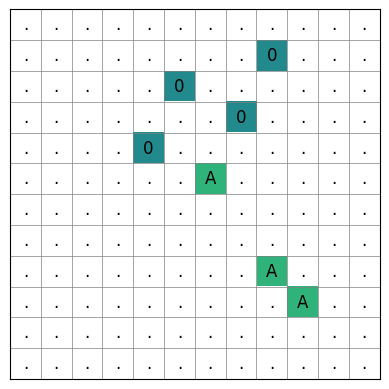

In [21]:
def to_int(char):
    if char == '.':
        return 0
    if char == '#':
        return 100
    return ord(char[0])

def plot_matrix(matrix):
    fig, ax = plt.subplots()
    matrix_int = np.vectorize(to_int)(matrix)
    cmap = plt.cm.viridis
    cmap.set_under('white')
    ax.imshow(matrix_int, cmap=cmap, vmin=0.1, vmax=99.9)

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, matrix[i, j], ha='center', va='center', color='black', fontsize=12)

    ax.set_xticks(np.arange(matrix.shape[1]))
    ax.set_yticks(np.arange(matrix.shape[0]))
    ax.set_xticks(np.arange(-0.5, matrix.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, matrix.shape[0], 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

plot_matrix(matrix)

In [22]:
unigue_values = []

(values, counts) = np.unique(matrix, return_counts=True)
for i, val in enumerate(values):
    if val != '.' and counts[i] > 1:
        unigue_values.append(str(val))

unigue_values

['0', 'A']

In [23]:
antinode_map = np.empty(matrix.shape, dtype='<U1')
matrix_base = matrix.copy

In [24]:
def place_antinodes(primary, secondary, map):
    global COUNTER
    px, py = primary
    sx, sy = secondary

    dx = sx - px
    dy = sy - py
    if 0 <= px - dx < MAX_LEN and 0 <= py - dy < MAX_LEN:
        map[px - dx, py - dy] = '#'
    if 0 <= sx + dx < MAX_LEN and 0 <= sy + dy < MAX_LEN:
        map[sx + dx, sy + dy] = '#'

In [25]:
fx, fy = (-1, -1)

for search_value in unigue_values:
    while 1:
        for y in range(0, MAX_LEN):
            for x in range(0, MAX_LEN):
                if matrix[x, y] != search_value:
                    continue
                # Primary searched char encountered
                if fx == fy == -1:
                    fx, fy = (x, y)
                    matrix[fx, fy] = matrix[fx, fy] + '*'
                    continue
                # Secondary searched char encountered
                place_antinodes((fx, fy), (x, y), antinode_map)


        if fx == fy == -1:
            break
        fx, fy = (-1, -1)

antinode_map

array([['', '', '', '', '', '', '#', '', '', '', '', '#'],
       ['', '', '', '#', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '#', '', '', '', '', '', '#', ''],
       ['', '', '#', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '#', '', ''],
       ['', '#', '', '', '', '', '#', '', '', '', '', ''],
       ['', '', '', '#', '', '', '', '', '', '', '', ''],
       ['#', '', '', '', '', '', '', '#', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '', '#', ''],
       ['', '', '', '', '', '', '', '', '', '', '#', '']], dtype='<U1')

Result: 14


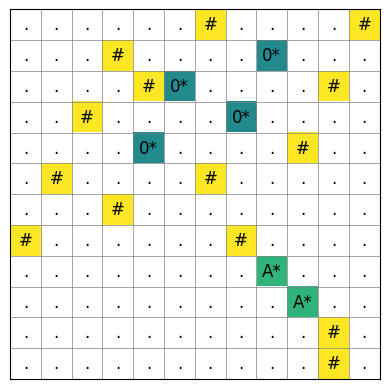

In [26]:
print(f"Result: {np.sum(np.char.count(antinode_map, '#'))}")
plot_matrix(np.where(antinode_map == '#', antinode_map, matrix))

## Part 2

In [27]:
def place_antinodes_line(primary, secondary, map):
    global COUNTER
    px, py = primary
    sx, sy = secondary

    dx = sx - px
    dy = sy - py
    while 0 <= px - dx < MAX_LEN and 0 <= py - dy < MAX_LEN:
        map[px - dx, py - dy] = '#'
        px = px - dx
        py = py - dy
    while 0 <= sx + dx < MAX_LEN and 0 <= sy + dy < MAX_LEN:
        map[sx + dx, sy + dy] = '#'
        sx = sx + dx
        sy = sy + dy

In [28]:
fx, fy = (-1, -1)

matrix = np.array([[y for y in x] for x in text.strip().split('\n')]).astype("<U3")

for search_value in unigue_values:
    while 1:
        for y in range(0, MAX_LEN):
            for x in range(0, MAX_LEN):
                if matrix[x, y] != search_value:
                    continue
                # Primary searched char encountered
                if fx == fy == -1:
                    fx, fy = (x, y)
                    matrix[fx, fy] = matrix[fx, fy] + '*'
                    continue
                # Secondary searched char encountered
                place_antinodes_line((fx, fy), (x, y), antinode_map)


        if fx == fy == -1:
            break
        fx, fy = (-1, -1)

antinode_map

array([['#', '#', '', '', '', '', '#', '', '', '', '', '#'],
       ['', '#', '', '#', '', '', '', '', '', '', '', ''],
       ['', '', '#', '', '#', '', '', '', '', '', '#', ''],
       ['', '', '#', '#', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '#', '', '', '', '', '#', '', ''],
       ['', '#', '', '', '', '#', '#', '', '', '', '', '#'],
       ['', '', '', '#', '', '', '#', '', '', '', '', ''],
       ['#', '', '', '', '', '#', '', '#', '', '', '', ''],
       ['', '', '#', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '#', '', '', '', '', '', '', ''],
       ['', '#', '', '', '', '', '', '', '', '', '#', ''],
       ['', '', '', '#', '', '', '', '', '', '', '#', '#']], dtype='<U1')

Result: 34


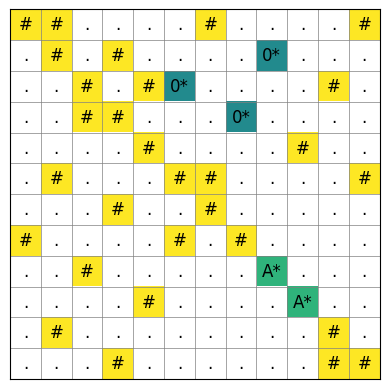

In [29]:
res = np.where(antinode_map == '#', antinode_map, matrix)
unique, counts = np.unique(res, return_counts=True)

np.where(unique=='.')[0][0]
counts[np.where(unique=='.')[0][0]] = 0

print(f"Result: {np.sum(counts)}")
plot_matrix(res)